## Simple Linear Regression

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
## Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

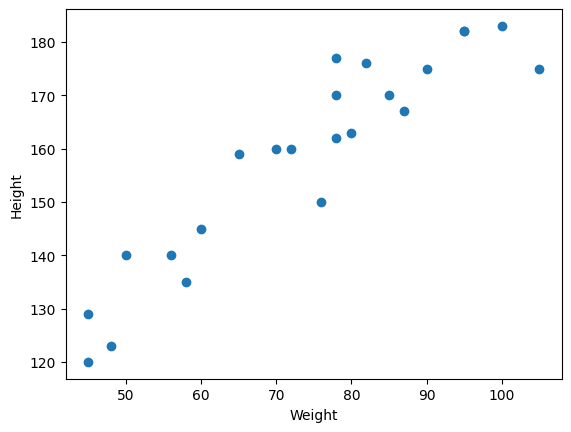

In [10]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [11]:
## divide our dataset into independent and dependent edatures
X=df[['Weight']] ##independent feature
y=df['Height'] ##dependent feature

In [12]:
## Train test split
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [22]:
X.shape

(23, 1)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [14]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [27]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [16]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

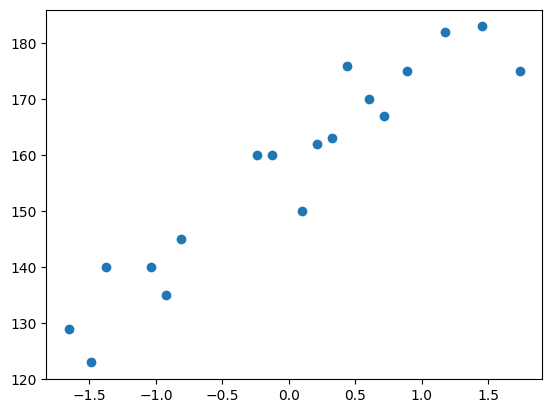

In [17]:
plt.scatter(X_train,y_train)

In [18]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [19]:
regressor=LinearRegression()

In [20]:
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


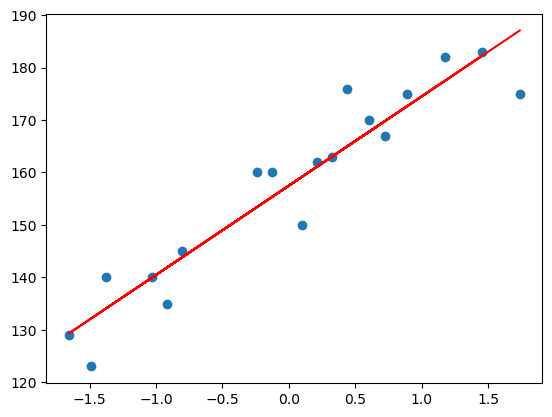

In [41]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [22]:
y_pred_test=regressor.predict(X_test)

In [23]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

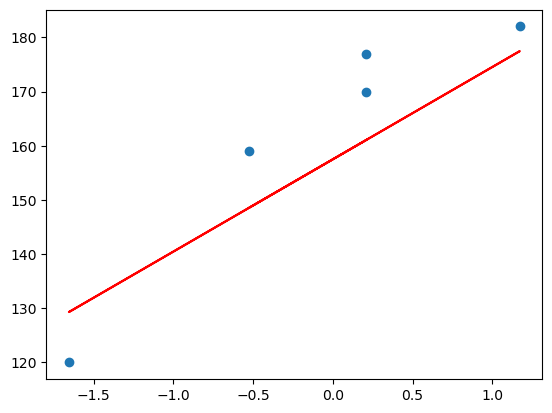

In [46]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [25]:
mse=mean_squared_error(y_test,y_pred_test) ##### y test is the actual value and y_pred_test is the predicted value
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [26]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [27]:
score

0.7769869860423441

## Adjusted R Square

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [28]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [53]:
regressor

LinearRegression()

In [29]:
## new data point weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

/Users/sumankumar/Desktop/ML concept project/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [59]:
scaled_weight[0]

array([0.32350772])

In [30]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


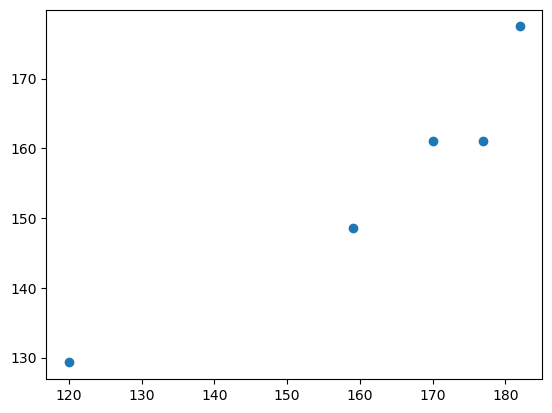

In [61]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [36]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

In [34]:
!pip install seaborn

     |████████████████████████████████| 294 kB 1.2 MB/s eta 0:00:01
You should consider upgrading via the '/Users/sumankumar/Desktop/ML concept project/venv/bin/python3 -m pip install --upgrade pip' command.


<Axes: xlabel='Height', ylabel='Count'>

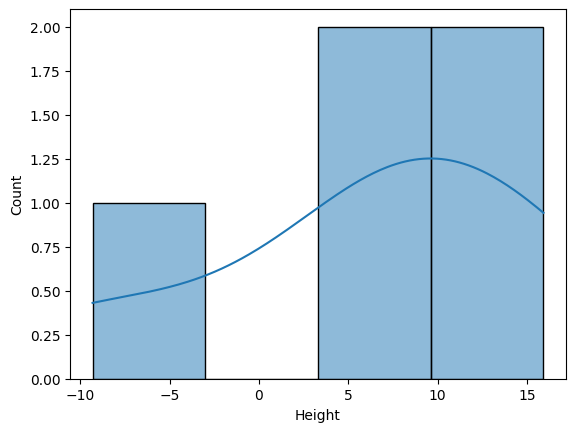

In [37]:
## plot this residuals
import seaborn as sns
sns.histplot(residuals, kde=True)


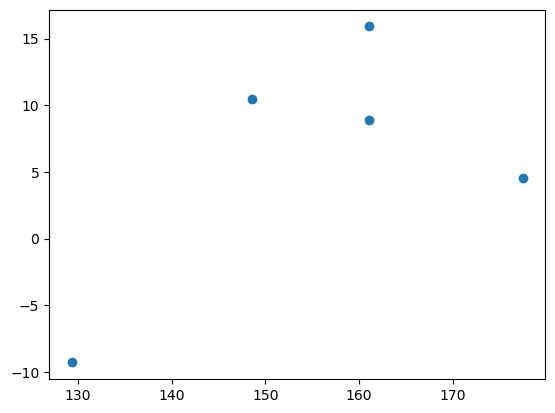

In [68]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)